<a href="https://colab.research.google.com/github/harry418/Trafficy/blob/main/Accident%20Detection/training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading dataset
Dataset is taken from making_dataset.ipynb. since lack of memory and ram we are only using 10% of dataset available at [link text](https://drive.google.com/open?id=1o0D7vnGUZHS72is6n1jV1ge2BDfObzVi)

https://drive.google.com/open?id=1o0D7vnGUZHS72is6n1jV1ge2BDfObzVi

**Importing Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


**Unzipping 10 percent of dataset.**

In [ ]:
!unzip '/content/drive/MyDrive/crash_detection/dataset_10_percent.zip' 

Archive:  /content/drive/MyDrive/crash_detection/dataset_10_percent.zip
   creating: content/crashs/train/
   creating: content/crashs/train/noaccident/
  inflating: content/crashs/train/noaccident/00001581.jpg  
  inflating: content/crashs/train/noaccident/00003882.jpg  
  inflating: content/crashs/train/noaccident/e1 0626.jpg  
  inflating: content/crashs/train/noaccident/d2 0007.jpg  
  inflating: content/crashs/train/noaccident/00001433.jpg  
  inflating: content/crashs/train/noaccident/d1 0517.jpg  
  inflating: content/crashs/train/noaccident/00000421.jpg  
  inflating: content/crashs/train/noaccident/b3 0096.jpg  
  inflating: content/crashs/train/noaccident/c2 1127.jpg  
  inflating: content/crashs/train/noaccident/a2 2395.jpg  
  inflating: content/crashs/train/noaccident/e2 0832.jpg  
  inflating: content/crashs/train/noaccident/d2 0232.jpg  
  inflating: content/crashs/train/noaccident/a2 3504.jpg  
  inflating: content/crashs/train/noaccident/b3 0421.jpg  
  inflating: cont

**Check files in directory.**

In [ ]:
import os

  # dir is your directory path
num_files = os.listdir('content/crashs/train')
print(num_files)

['noaccident', 'accident']


In [ ]:
import os
for i in num_files:
  path, dirs, files = next(os.walk('content/crashs/train'+'/'+i))
  file_count = len(files)
  print('{} contain {} number of files.'.format(i,str(file_count)))

noaccident contain 2566 number of files.
accident contain 1333 number of files.


**Setting Directory as current workspace.**

In [ ]:
data_train = 'content/crashs/train'

# Classification

**Install and upgrade FastAI.**

In [ ]:
!pip install fastai --upgrade

     |████████████████████████████████| 194kB 17.6MB/s 
     |████████████████████████████████| 61kB 9.1MB/s 
     |████████████████████████████████| 12.8MB 250kB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible.
  Found existing installation: torch 1.8.0+cu101
    Uninstalling torch-1.8.0+cu101:
      Successfully uninstalled torch-1.8.0+cu101
  Found existing installation: torchvision 0.9.0+cu101
    Uninstalling torchvision-0.9.0+cu101:
      Successfully uninstalled torchvision-0.9.0+cu101
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


**Import Required libraries from fastai.**

In [ ]:
from fastai.vision.all import *
from fastai.vision import *
from fastai.metrics import *

#from fastai.vision.core import *
from fastai.vision.data import *

**Making a Datablock for preprocessing and classification.**

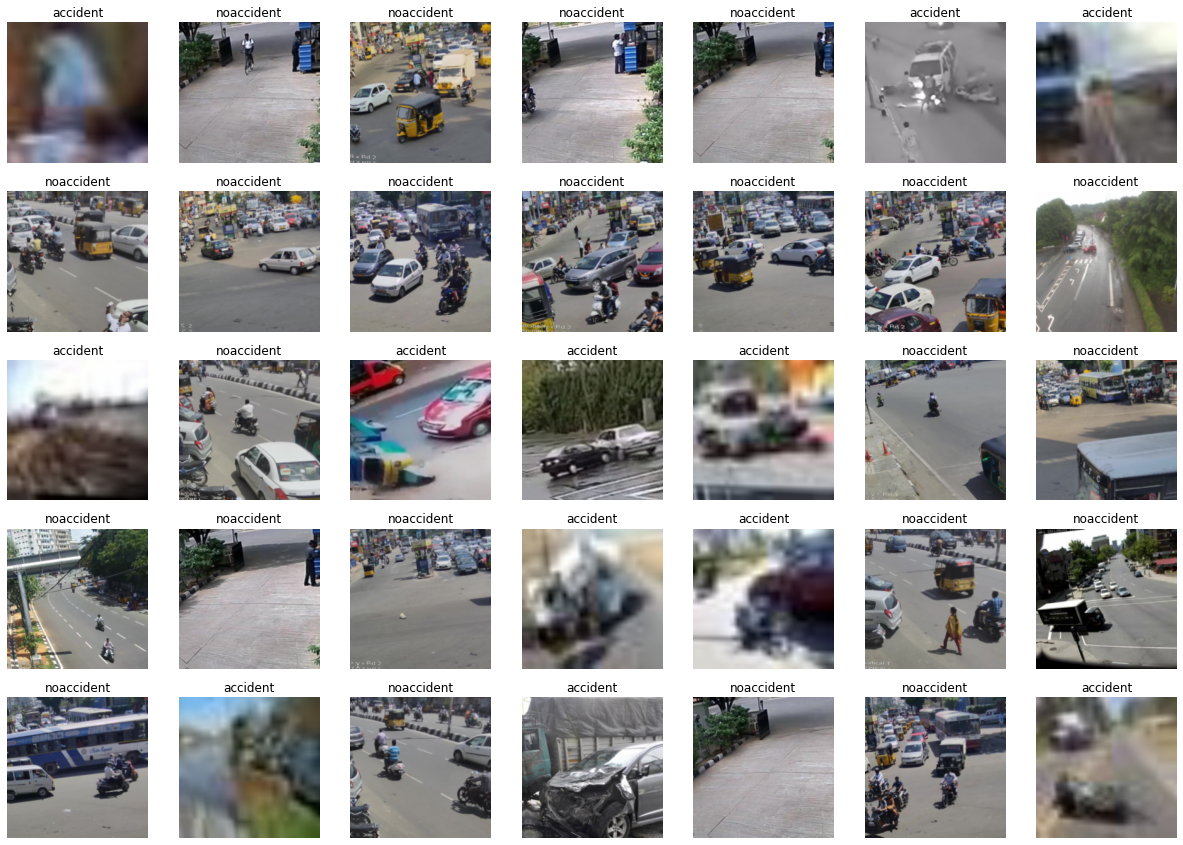

In [ ]:

dblock = DataBlock(blocks= (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = parent_label,
                   splitter  = RandomSplitter(),
                   batch_tfms=aug_transforms(batch=True, max_rotate=5,p_lighting=0.5),
                   item_tfms = Resize(224,224))
dls = dblock.dataloaders(data_train)
dls.show_batch(max_n=35)

# Densenet121 Training

**Create a cnn_learner using densenet121 as architecture and set accuracy and error rate as validation matrix. tune model upto 5 epochs.**

In [ ]:
learner1 = cnn_learner(dls,models.densenet121,metrics=[accuracy,error_rate])
learner1.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.270504,0.531927,0.789474,0.210526,01:14


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.072017,1.060901,0.690629,0.309371,01:17
1,0.060819,1.542698,0.670090,0.329910,01:17
2,0.052161,0.550313,0.811297,0.188703,01:17
3,0.033875,1.099038,0.721438,0.278562,01:18
4,0.022339,1.003930,0.730424,0.269576,01:17


**Find optimum learning rate.**

In [ ]:
learner1.lr_find()
 

**Unfreeze weights of last layers, and train on optimum cyclic learning rate. and use savedModelCallback for saving Best model weights.**

In [ ]:
learner1.unfreeze()
learner1.fit_one_cycle(30, lr_max=(1.3e-7, 1.5e-6, 1e-6),cbs=[SaveModelCallback(fname='densenet_best_model'))


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.043451,0.680248,0.768935,0.231065,01:18
1,0.047395,0.835799,0.727856,0.272144,01:17
2,0.042965,0.859444,0.711168,0.288832,01:17
3,0.044614,0.890474,0.707317,0.292683,01:18
4,0.043985,0.679264,0.765083,0.234917,01:18
5,0.045871,0.719080,0.754814,0.245186,01:17
6,0.045216,0.858322,0.722721,0.277279,01:17
7,0.042452,0.825610,0.726573,0.273427,01:18
8,0.044617,0.798561,0.740693,0.259307,01:18
9,0.047971,0.658496,0.770218,0.229782,01:18


Better model found at epoch 0 with valid_loss value: 0.6802475452423096.
Better model found at epoch 4 with valid_loss value: 0.67926424741745.
Better model found at epoch 9 with valid_loss value: 0.6584959030151367.
Better model found at epoch 20 with valid_loss value: 0.6553390026092529.
Better model found at epoch 21 with valid_loss value: 0.5503706336021423.


# Results

In [ ]:
learner1. show_training_loop()

**Plotting validation loss during training.**

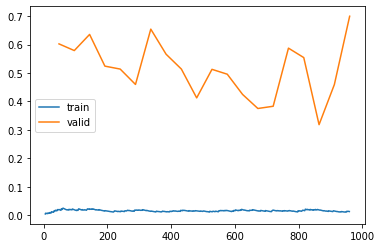

In [ ]:
learner1.recorder.plot_loss()

**Confusion matrics**

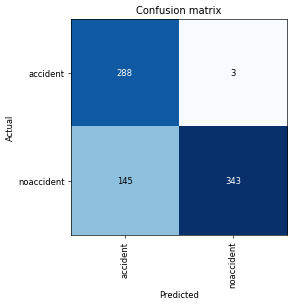

In [ ]:
interp = ClassificationInterpretation.from_learner(learner1)
interp.plot_confusion_matrix(figsize=(5,5), dpi=60)

**Classification Report**

In [ ]:
interp.print_classification_report()

              precision    recall  f1-score   support

    accident       0.67      0.99      0.80       291
  noaccident       0.99      0.70      0.82       488

    accuracy                           0.81       779
   macro avg       0.83      0.85      0.81       779
weighted avg       0.87      0.81      0.81       779



**Show results**

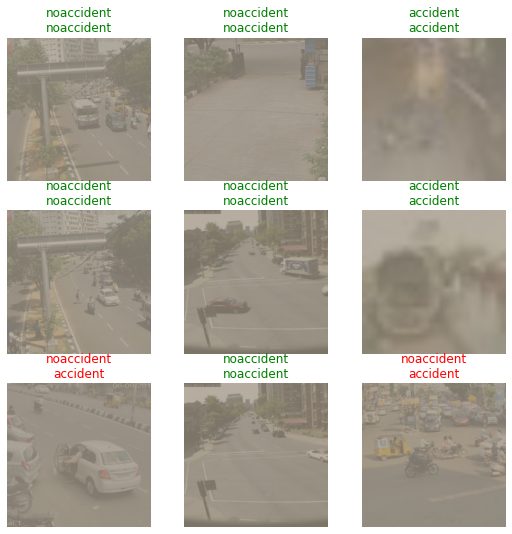

In [ ]:
learner1.show_results()

# R